implement an undercomplete autoencoder using python

. apply and implement autoencodr on mnsit dataset

. use a bottleneck layers to reduce dimentionality

. evaluate the reconstruction cost

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
input_dim = 784  # 28x28 pixels
bottleneck_dim = 64  # Size of the bottleneck layer

input_layer = Input(shape=(input_dim,))
encoder_layer = Dense(bottleneck_dim, activation='relu')(input_layer)

decoder_layer = Dense(input_dim, activation='sigmoid')(encoder_layer)

autoencoder = Model(input_layer, decoder_layer)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          50,960 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.3487 - val_loss: 0.1631
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1542 - val_loss: 0.1285
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1246 - val_loss: 0.1090
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1072 - val_loss: 0.0967
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0960 - val_loss: 0.0893
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0891 - val_loss: 0.0844
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0844 - val_loss: 0.0813
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0815 - val_loss: 0.0790
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0794 - val_loss: 0.0775
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0780 - val_loss: 0.0765
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0769 - val_loss: 0.0756
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Evaluate the model on the test set
reconstruction_cost = autoencoder.evaluate(x_test, x_test)
print(f'Reconstruction cost: {reconstruction_cost}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0721
Reconstruction cost: 0.07234016805887222


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


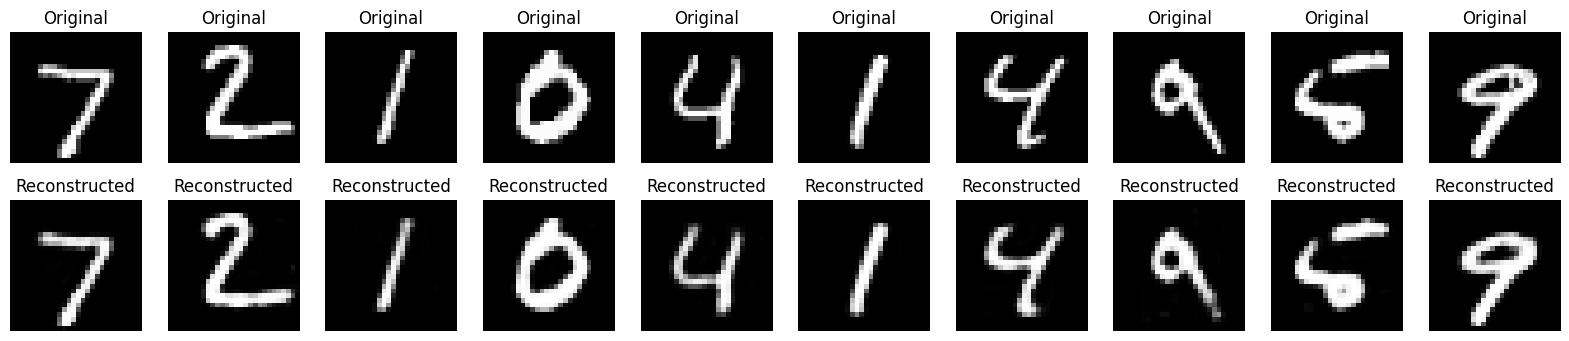

In [ ]:
# Encode and decode some images from the test set
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Number of images to display
n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

In [ ]:
# Load the CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the 32x32x3 images into 3072-dimensional vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)  # (50000, 3072)
print(x_test.shape)   # (10000, 3072)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(50000, 3072)
(10000, 3072)


In [ ]:
# Define the dimensions of the input and the bottleneck layer
input_dim = 3072  # 32x32x3 = 3072
bottleneck_dim = 128  # Size of the bottleneck layer

# Define the encoder
input_layer = Input(shape=(input_dim,))
encoder_layer = Dense(bottleneck_dim, activation='relu')(input_layer)

# Define the decoder
decoder_layer = Dense(input_dim, activation='sigmoid')(encoder_layer)

# Create the autoencoder model
autoencoder = Model(input_layer, decoder_layer)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3072)                │         396,288 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 789,632 (3.01 MB)

 Trainable params: 789,632 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 0.6611 - val_loss: 0.6233
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - loss: 0.6188 - val_loss: 0.6136
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 0.6092 - val_loss: 0.6052
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.6037 - val_loss: 0.6055
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - loss: 0.5996 - val_loss: 0.5989
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 0.5962 - val_loss: 0.5945
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.5938 - val_loss: 0.5928
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.5920 - val_loss: 0.5944
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - loss: 0.5917 - val_loss: 0.5909
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.5905 - val_loss: 0.5906
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.5894 - val_loss: 0.5903
Epoch 12/50
196/196 ━━━━━━━━━━

In [ ]:
# Evaluate the model on the test set
reconstruction_cost = autoencoder.evaluate(x_test, x_test)
print(f'Reconstruction cost: {reconstruction_cost}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


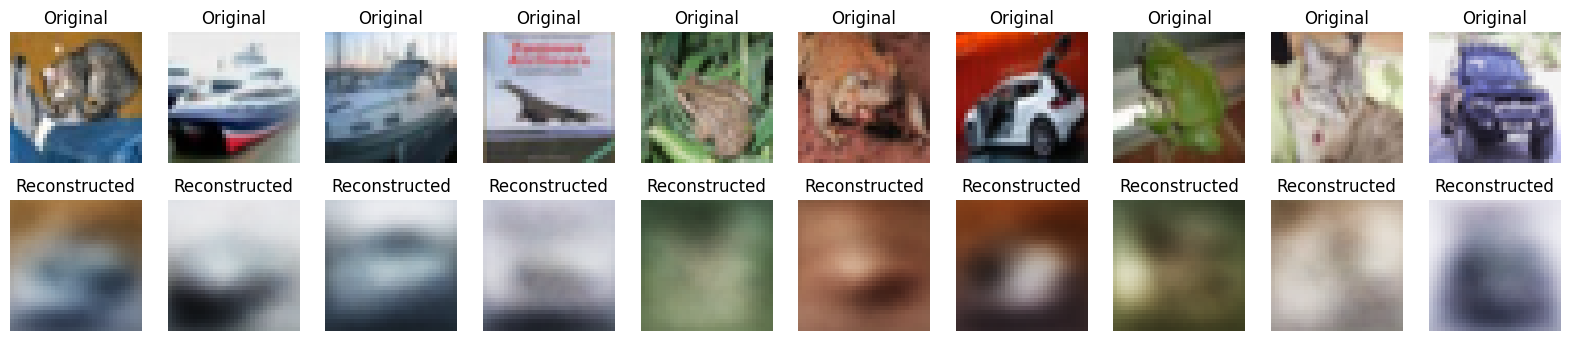

In [ ]:
# Encode and decode some images from the test set
decoded_imgs = autoencoder.predict(x_test)

# Number of images to display
n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.title("Original")
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()